In [1]:
import numpy as np
import os
import tensorflow as tf
#import tensorflow_datasets as tfds
from tensorflow import keras, Tensor
from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
#mounts to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#configurations for augmenting the dataset
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomContrast(0.2),
  layers.RandomBrightness(0.2)
])

Found 122 files belonging to 3 classes.
Using 98 files for training.
Found 122 files belonging to 3 classes.
Using 24 files for validation.
['diablo', 'mmh', 'vis']
tf.Tensor(4, shape=(), dtype=int64)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)


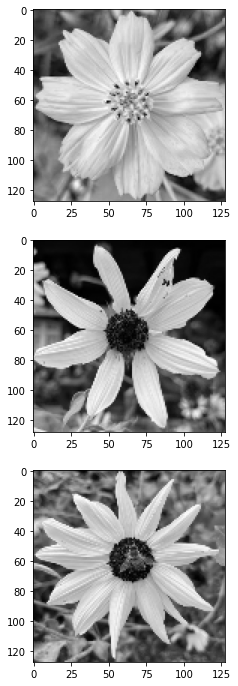

In [4]:

# data_dir = "/content/drive/MyDrive/shapes"
# data_dir = "/content/drive/MyDrive/Flowers/flowers"
data_dir = "/content/drive/MyDrive/Flower Images/cropped_images"
img_width = 128
img_height = 128
batch_size = 32


# Gets training data from data_dir
# 80% of the total data
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  label_mode='int',
  validation_split=0.2,
  color_mode="grayscale",
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Gets testing data from data_dir
# 20% of the total data
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  label_mode='int',
  subset="validation",
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# shows which classes are available
num_classes = len(train_ds.class_names)
print(train_ds.class_names)
print(train_ds.__len__())

# data_aug = Sequential(layers.Lambda(lambda x: both_filters_greyscale1_tf(x)))
# train_ds = train_ds.map(lambda x, y: (tf.image.sobel_edges(x), y))


fig, ax = plt.subplots(3)
fig.set_size_inches(12,12)


for images, labels in train_ds.take(1):
  for idx in range(3):
    image = tf.transpose(images[idx], perm=[2,0,1])
    print(images[idx].shape)
    ax[idx].imshow(image[0], cmap="gray")

fig.show()


(128, 128, 1)
(128, 128, 1)
(128, 128, 1)


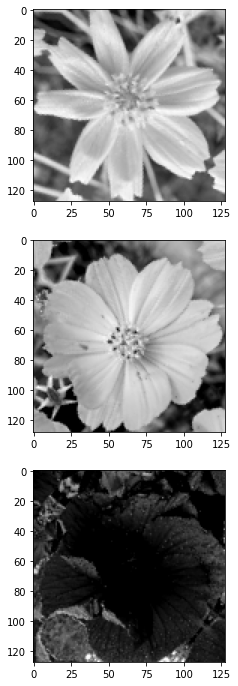

In [5]:
#augments the data, then concatonates augmented set with original dataset
new_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
total_ds = new_ds.concatenate(train_ds)

fig, ax = plt.subplots(3)
fig.set_size_inches(12,12)


for images, labels in new_ds.take(1):
  for idx in range(3):
    image = tf.transpose(images[idx], perm=[2,0,1])
    print(images[idx].shape)
    ax[idx].imshow(image[0], cmap="gray")

fig.show()

In [6]:
#11/14/2028
#Previous iteration of model
model = Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), input_shape=(128, 128, 1), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(62, 62, 16), activation='relu'),
    tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), input_shape=(60, 60, 32), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(29, 29, 4), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.build(input_shape=(batch_size, img_width, img_height, 1))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 128, 128, 1)         0         
                                                                 
 conv2d (Conv2D)             (32, 124, 124, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 62, 62, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 60, 60, 32)          4640      
                                                                 
 conv2d_2 (Conv2D)           (32, 58, 58, 4)           1156      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 29, 29, 4)          0         
 2D)                                                  

In [8]:
#11/28/2022: Andy Hufford
#Final iteration of model
#used to rec
model = Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(11, 11), input_shape=(128, 128, 1), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(7, 7), input_shape=(64, 64, 16), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), input_shape=(32, 32, 32), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(16, 16, 64), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(16, 16, 64), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), input_shape=(16, 16, 64), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.build(input_shape=(batch_size, img_width, img_height, 1))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (32, 128, 128, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (32, 128, 128, 16)        1952      
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 64, 64, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 64, 64, 32)          25120     
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 32, 32, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (32, 32, 32, 64)         

In [9]:
#11/14/2022: Andy Hufford
#uses stochastic gradient descent
sgd = tf.keras.optimizers.SGD(learning_rate=.01, momentum=.9)

#compiles the model with
#loss: CrossEntropyLoss 
#optimizer: Mini-batch Gradient Descent
#measures: accuracy
model.compile(
  optimizer="SGD",
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

# begins training on GPU
with tf.device("/device:GPU:0"):
  history_1 = model.fit(
      # train_ds,
      total_ds,
      validation_data=test_ds,
      epochs=40
  )

Epoch 1/40
8/8 [==============================] - 13s 529ms/step - loss: 1.0952 - accuracy: 0.2806 - val_loss: 1.0802 - val_accuracy: 0.5833
Epoch 2/40
8/8 [==============================] - 1s 102ms/step - loss: 1.0898 - accuracy: 0.4286 - val_loss: 1.0867 - val_accuracy: 0.1667
Epoch 3/40
8/8 [==============================] - 1s 119ms/step - loss: 1.0838 - accuracy: 0.4388 - val_loss: 1.0823 - val_accuracy: 0.1667
Epoch 4/40
8/8 [==============================] - 2s 143ms/step - loss: 1.0760 - accuracy: 0.3724 - val_loss: 1.0503 - val_accuracy: 0.2917
Epoch 5/40
8/8 [==============================] - 1s 104ms/step - loss: 1.0625 - accuracy: 0.4592 - val_loss: 1.0606 - val_accuracy: 0.1667
Epoch 6/40
8/8 [==============================] - 1s 105ms/step - loss: 1.0483 - accuracy: 0.4184 - val_loss: 0.9908 - val_accuracy: 0.6667
Epoch 7/40
8/8 [==============================] - 1s 109ms/step - loss: 1.0316 - accuracy: 0.4082 - val_loss: 0.9878 - val_accuracy: 0.1667
Epoch 8/40
8/8 [===

In [13]:
model.save("/content/drive/My Drive/VIP - Plant Recognition/cnn_model.h5")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


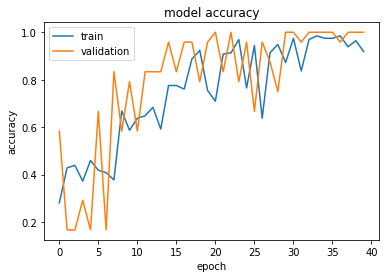

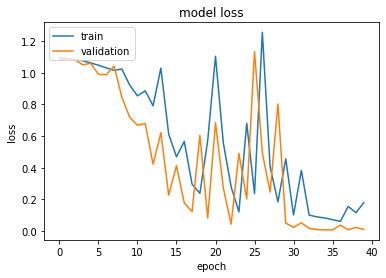

In [12]:
#11/14/2022
#Prints results from models training and testing
#Along with graphs


print(history_1.history.keys())
#  "Accuracy"
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:

def grey(image):
  out = image[:,:,:,1] * 0.2126 + image[:,:,:,1] *  0.7152 + image[:,:,:,2] * 0.0722
  return tf.cast(out,tf.int32)

def both_filters_greyscale1_tf(image: Tensor):
  image = tf.transpose(image[0], perm=[2,0,1])[0]
  #image = tf.cast(image, tf.int32)
  #kernel to traverse x
  horizontal_filter = [[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]]
  horizontal_filter = tf.constant(horizontal_filter, tf.float32)

  #kernel to traverse y
  vertical_filter =   [[-1,-2,-1],
                      [0,0,0],
                      [1,2,1]]
  vertical_filter = tf.constant(vertical_filter, tf.float32)

  height, width = image.shape
  
  new_image = tf.Variable(tf.zeros(image.shape))
  print(new_image.shape)

  filtered_x = tf.nn.conv2d(image_resized, horizontal_filter,
                          strides=[1, 1, 1, 1], padding='SAME')
  filtered_y = tf.nn.conv2d(image_resized, vertical_filter,
                            strides=[1, 1, 1, 1], padding='SAME')

  for i in range(1, height - 2):
    for j in range(1, width-2):
        local_pixels = image[i-1:i+2, j-1:j+2]
        
        horizontal_transformed_pixels = tf.multiply(horizontal_filter, local_pixels)
        horizontal_score = (tf.math.reduce_sum(horizontal_transformed_pixels))    #these values are not plot to 0-1 because otherwise 
                                                                    #the result becomes too dim.
    
        vertical_transformed_pixels = tf.multiply(vertical_filter, local_pixels)
        vertical_score = (tf.math.reduce_sum(vertical_transformed_pixels))
        
        edge_score = (vertical_score**2 + horizontal_score**2)**0.5
        print(horizontal_score.numpy())
        print(vertical_score.numpy())
        print(edge_score.numpy())
        new_image[i][j] = edge_score.numpy()
  return new_image

class CustomLayer(Layer):
  def __init__(self, **kwargs):    
    super(CustomLayer, self).__init__(**kwargs)
  # def build(self, input_shape): 
  #   # self.kernel = self.add_weight(name = 'kernel', 
  #   #                               shape = (input_shape[1], self.output_dim), 
  #   #                               initializer = 'normal', 
  #   #                               trainable = True) 
  #   super(CustomLayer, self).build(input_shape) # Be sure to call this at the end 
  def call(self, input_data): 
    assert input_data.shape == (128,128,3), f"input_data.shape: {input_data.shape}"
    return input_data[:,:,0] * 0.2126 + input_data[:,:,1] *  0.7152 + input_data[:,:,2] * 0.0722
  def compute_output_shape(self, input_shape): return (input_shape[0], self.output_dim)